In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Funções de pertinencia ( Triangular, Trapezoidal e Gaussiana )

In [4]:
# Função de pertinencia Triangular Fuzzy
def triangular(x, a, m, b):
    if x < a:
        return 0
    elif a <= x < m:
        return (x - a) / (m - a) if (m - a) != 0 else 0
    elif m <= x <= b:
        return (b - x) / (b - m) if (b - m) != 0 else 1
    elif x > b:
        return 0
    else:
        return 0

# Funcao de pertinencia Trapezoidal Fuzzy
def trapezoidal(x, a, m, n, b):
    if x < a:
        return 0
    elif a <= x < m:
        return (x - a) / (m - a) if (m - a) != 0 else 0
    elif m <= x <= n:
        return 1
    elif n <= x < b:
        return (b - x) / (b - n) if (b - n) != 0 else 0
    elif x > b:
        return 0
    else:
        return 0

def gaussiana(x, m, k):
    # k = coeficiente de largura (quanto menor mais larga)
    return np.exp(-k * (x - m) ** 2)

# Grafico das funções de pertinencia
## valores = [20, 33, 77]

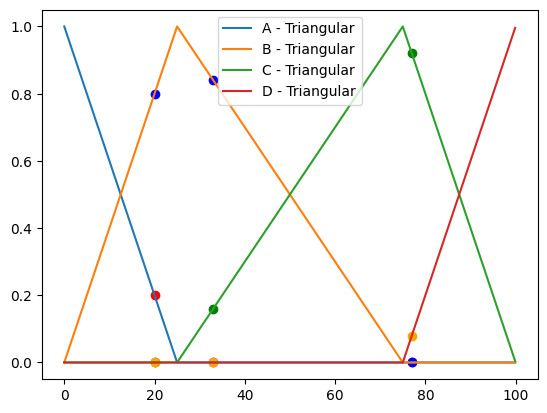

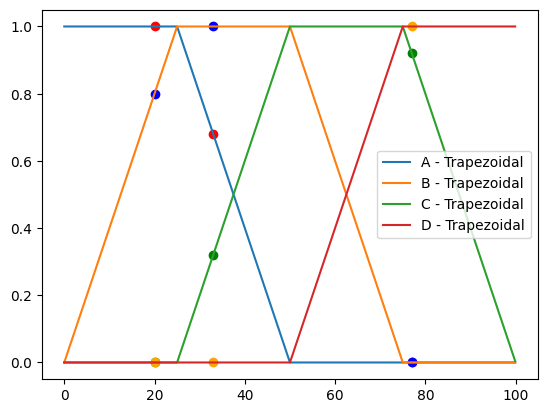

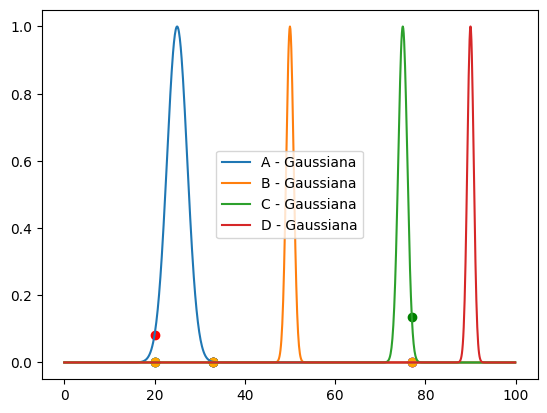

In [5]:
valores = [20, 33, 77]
# Funções de pertinência
funcoes_pertinenciatriangular = {'A': (0, 0, 25), 'B': (0, 25, 75), 'C': (25, 75, 100), 'D': (75, 100, 100)}
funcoes_pertinenciatrapzoidal = {'A': (0, 0, 25, 50), 'B': (0, 25, 50, 75), 'C': (25, 50, 75, 100), 'D': (50, 75, 100, 100)}
funcoes_pertinenciagaussiana = {'A': (25, 0.1), 'B': (50, 0.75), 'C': (75, 0.5), 'D': (90, 1)}

# Plotar gráficos das funções de pertinência
x = np.arange(0, 100, 0.1)
for chave, params in funcoes_pertinenciatriangular.items():
    y = [triangular(i, *params) for i in x]
    plt.plot(x, y, label=f'{chave} - Triangular')
for valor in valores:
    grauspertinencia = {}
    cores = ['red', 'blue', 'green', 'orange', 'purple']  # Cores para os valores em valores
    for i, chave in enumerate(funcoes_pertinenciatriangular.keys()):
        params = funcoes_pertinenciatriangular[chave]
        grau_pertinencia = triangular(valor, *params)
        grauspertinencia[chave] = grau_pertinencia
        plt.scatter([valor], [grau_pertinencia], marker='o', color=cores[i])
plt.legend()
plt.show()
for chave, params in funcoes_pertinenciatrapzoidal.items():
    y = [trapezoidal(i, *params) for i in x]
    plt.plot(x, y, label=f'{chave} - Trapezoidal')
for valor in valores:
    grauspertinencia = {}
    cores = ['red', 'blue', 'green', 'orange', 'purple']  # Cores para os valores em valores
    for i, chave in enumerate(funcoes_pertinenciatrapzoidal.keys()):
        params = funcoes_pertinenciatrapzoidal[chave]
        grau_pertinencia = trapezoidal(valor, *params)
        grauspertinencia[chave] = grau_pertinencia
        plt.scatter([valor], [grau_pertinencia], marker='o', color=cores[i])
plt.legend()
plt.show()
for chave, params in funcoes_pertinenciagaussiana.items():
    y = [gaussiana(i, *params) for i in x]
    plt.plot(x, y, label=f'{chave} - Gaussiana')
for valor in valores:
    grauspertinencia = {}
    cores = ['red', 'blue', 'green', 'orange', 'purple']  # Cores para os valores em valores
    for i, chave in enumerate(funcoes_pertinenciagaussiana.keys()):
        params = funcoes_pertinenciagaussiana[chave]
        grau_pertinencia = gaussiana(valor, *params)
        grauspertinencia[chave] = grau_pertinencia
        plt.scatter([valor], [grau_pertinencia], marker='o', color=cores[i])
plt.legend()
plt.show()

# OPERADORES DE COMPLEMENTO

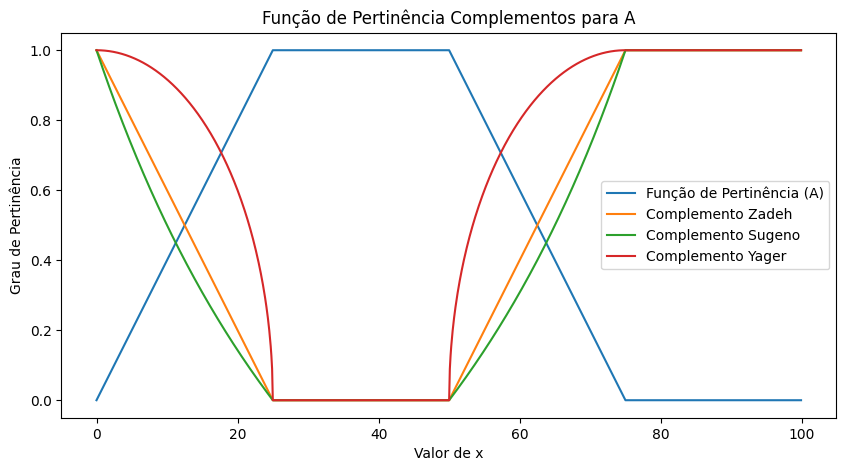

In [6]:
def zadeh_complemento(grau_pertinencia):
    return 1 - grau_pertinencia

#Sugeno
def sugeno_complemento(grau_pertinencia, s):
    if s >= -1:
        return (1 - grau_pertinencia) / (1 + s * grau_pertinencia)
    else:
        raise ValueError("O valor de 's' deve estar no intervalo de -1 a infinito.")
#Yager
def yager_complemento(grau_pertinencia, w):
    if w > 0:
        resultado = (1 - grau_pertinencia ** w) ** (1 / w)
        return resultado
    else:
        raise ValueError("O valor de 'w' deve estar no intervalo (0, infi).")

x = np.arange(0, 100, 0.1)


params_A = (0, 25, 50, 75)
graus_A = [trapezoidal(valor, *params_A) for valor in x]

complemento_zadeh_A = [zadeh_complemento(grau) for grau in graus_A]
complemento_sugeno_A = [sugeno_complemento(grau, 0.5) for grau in graus_A]
complemento_yager_A = [yager_complemento(grau, 2) for grau in graus_A]

plt.figure(figsize=(10, 5))
plt.plot(x, graus_A, label='Função de Pertinência (A)')
plt.plot(x, complemento_zadeh_A, label='Complemento Zadeh')
plt.plot(x, complemento_sugeno_A, label='Complemento Sugeno')
plt.plot(x, complemento_yager_A, label='Complemento Yager')
plt.legend()
plt.title('Função de Pertinência Complementos para A')
plt.xlabel('Valor de x')
plt.ylabel('Grau de Pertinência')
plt.show()

# OPERADORES DE UNIÃO

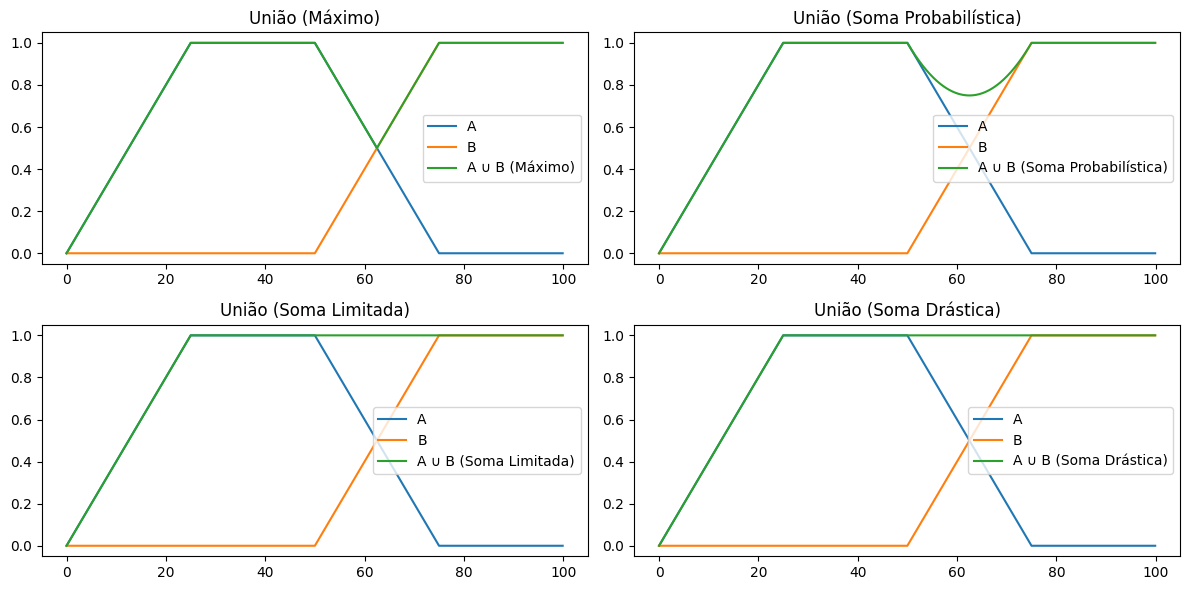

In [7]:
def maximo(graus_pertinencia):
    return max(graus_pertinencia)

# Somas probabilísticas
def soma_probabilistica(graus_pertinencia):
    return sum(graus_pertinencia) - np.prod(graus_pertinencia)

# Somas limitadas
def soma_limitada(a, b):
    return min(1, a + b)

# Somas drasticas
def soma_drastica(a, b):
    if b == 0:
        return a
    elif a == 0:
        return b
    else:
        return 1

params_A = (0, 25, 50, 75)
params_B = (50, 75, 100, 100)

graus_A = [trapezoidal(valor, *params_A) for valor in x]
graus_B = [trapezoidal(valor, *params_B) for valor in x]

uniao_maximo = [maximo([graus_A[i], graus_B[i]]) for i in range(len(x))]
uniao_soma_probabilistica = [soma_probabilistica([graus_A[i], graus_B[i]]) for i in range(len(x))]
uniao_soma_limitada = [soma_limitada(graus_A[i], graus_B[i]) for i in range(len(x))]
uniao_soma_drastica = [soma_drastica(graus_A[i], graus_B[i]) for i in range(len(x))]


plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(x, graus_A, label='A')
plt.plot(x, graus_B, label='B')
plt.plot(x, uniao_maximo, label='A ∪ B (Máximo)')
plt.legend()
plt.title('União (Máximo)')

plt.subplot(2, 2, 2)
plt.plot(x, graus_A, label='A')
plt.plot(x, graus_B, label='B')
plt.plot(x, uniao_soma_probabilistica, label='A ∪ B (Soma Probabilística)')
plt.legend()
plt.title('União (Soma Probabilística)')

plt.subplot(2, 2, 3)
plt.plot(x, graus_A, label='A')
plt.plot(x, graus_B, label='B')
plt.plot(x, uniao_soma_limitada, label='A ∪ B (Soma Limitada)')
plt.legend()
plt.title('União (Soma Limitada)')

plt.subplot(2, 2, 4)
plt.plot(x, graus_A, label='A')
plt.plot(x, graus_B, label='B')
plt.plot(x, uniao_soma_drastica, label='A ∪ B (Soma Drástica)')
plt.legend()
plt.title('União (Soma Drástica)')

plt.tight_layout()
plt.show()

# OPERADORES DE INTERSEÇÃO

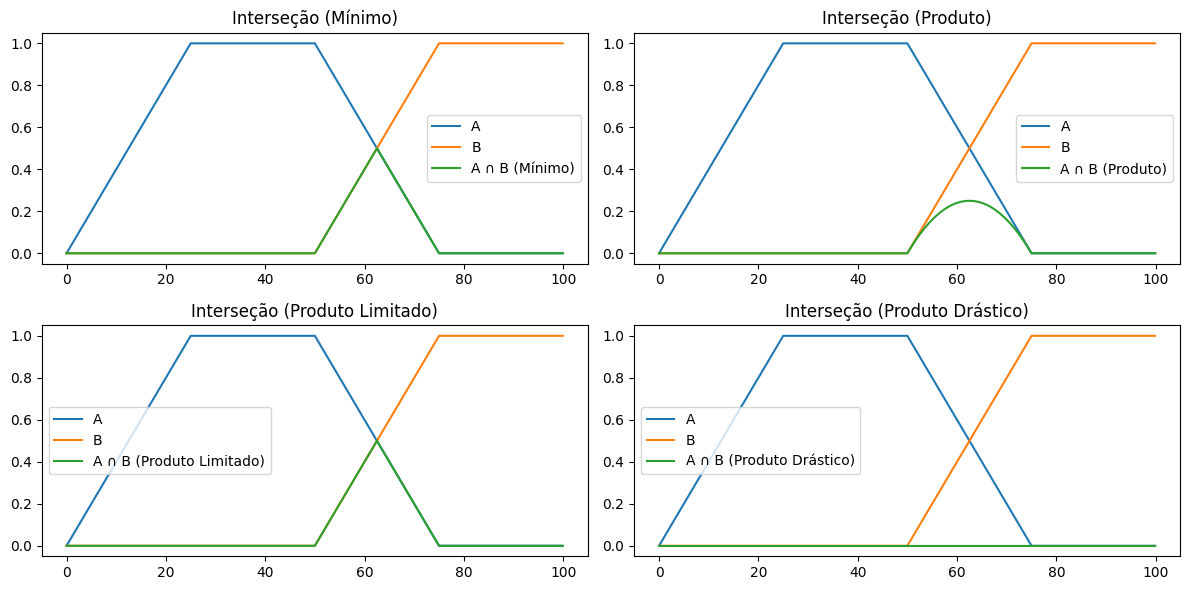

In [8]:
# Mínimo
def minimo(graus_pertinencia):
    return min(graus_pertinencia)

# Produto
def produto(graus_pertinencia):
    return np.prod(graus_pertinencia)

# Produto limitado
def produto_limitado(a, b):
    return max(0, min(a, b))

# Produto drasticos
def produto_drastico(a, b):
    if b == 1:
        return a
    elif a == 1:
        return b
    else:
        return 0

intersecao_minimo = [minimo([graus_A[i], graus_B[i]]) for i in range(len(x))]
intersecao_produto = [produto([graus_A[i], graus_B[i]]) for i in range(len(x))]
intersecao_produto_limitado = [produto_limitado(graus_A[i], graus_B[i]) for i in range(len(x))]
intersecao_produto_drastico = [produto_drastico(graus_A[i], graus_B[i]) for i in range(len(x))]


plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.plot(x, graus_A, label='A')
plt.plot(x, graus_B, label='B')
plt.plot(x, intersecao_minimo, label='A ∩ B (Mínimo)')
plt.legend()
plt.title('Interseção (Mínimo)')

plt.subplot(2, 2, 2)
plt.plot(x, graus_A, label='A')
plt.plot(x, graus_B, label='B')
plt.plot(x, intersecao_produto, label='A ∩ B (Produto)')
plt.legend()
plt.title('Interseção (Produto)')

plt.subplot(2, 2, 3)
plt.plot(x, graus_A, label='A')
plt.plot(x, graus_B, label='B')
plt.plot(x, intersecao_produto_limitado, label='A ∩ B (Produto Limitado)')
plt.legend()
plt.title('Interseção (Produto Limitado)')

plt.subplot(2, 2, 4)
plt.plot(x, graus_A, label='A')
plt.plot(x, graus_B, label='B')
plt.plot(x, intersecao_produto_drastico, label='A ∩ B (Produto Drástico)')
plt.legend()
plt.title('Interseção (Produto Drástico)')

plt.tight_layout()
plt.show()